# Imports

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
df = pd.read_csv('emails.csv')

In [28]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [29]:
df.shape

(5172, 3002)

In [30]:
for i in range(0,5172):
    df['Email No.'][i] = df['Email No.'][i].split(" ")[1]

C:\Users\Lenovo\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [33]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [34]:
cols = list(df.columns)
cols.pop()
cols.pop(0)
len(cols)

3000

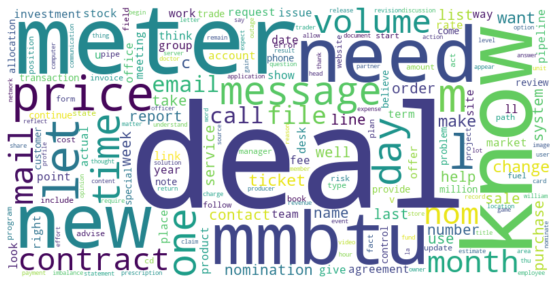

In [35]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join([str(i) for i in cols]))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\Lenovo\.conda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Prediction', ylabel='count'>

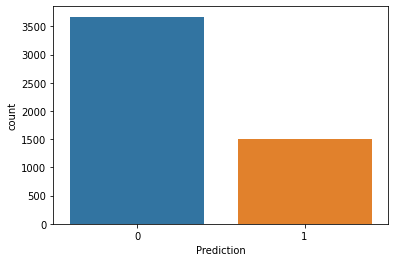

In [36]:
sns.countplot(df['Prediction'])

In [37]:
df['Prediction'].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

# Naive Bayes Classification Model

In [38]:
X = df.iloc[:,1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [39]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [40]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.25)

In [41]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((3879, 3000), (1293, 3000), (3879,), (1293,))

# Naive Bayes

In [42]:
from sklearn import metrics
mnb = MultinomialNB(alpha=1.9)         # alpha by default is 1. alpha must always be > 0. 
# alpha is the '1' in the formula for Laplace Smoothing (P(words))
mnb.fit(train_x,train_y)
y_pred1 = mnb.predict(test_x)
print("Accuracy Score for Naive Bayes : ", metrics.accuracy_score(y_pred1,test_y))

Accuracy Score for Naive Bayes :  0.9365815931941222


# SVM

In [43]:
from sklearn.svm import SVC
svc = SVC(C=1.0,kernel='rbf',gamma='auto')         
# C -regularization parameter. Here, 
# L2 - penalty (inverse of the strength of regularization)
# As C increases, model overfits.
# Kernel - radial basis function kernel.
# gamma (only used for rbf kernel) : As gamma increases, model overfits.
svc.fit(train_x,train_y)
y_pred2 = svc.predict(test_x)
print("Accuracy Score for SVC : ", metrics.accuracy_score(y_pred2,test_y))

Accuracy Score for SVC :  0.8894044856921887


# Random Forest using Bagging

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
# n_estimators = No. of trees in the forest
# criterion = basis of making the decision tree split, either on gini impurity('gini'), or on infromation gain('entropy')
rfc.fit(train_x,train_y)
y_pred3 = rfc.predict(test_x)
print("Accuracy Score of Random Forest Classifier : ", metrics.accuracy_score(y_pred3,test_y))

Accuracy Score of Random Forest Classifier :  0.9706109822119103


In [45]:
df.shape

(5172, 3002)

In [46]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [47]:
Status = []
'''for i in range(0,df.shape[0]):
    if df['Prediction'][i]==0:
        Status.append("Not spam")
    else:
        Status.append("Spam")'''

Status = ["Not spam" if df['Prediction'][i]==0 else "Spam" for i in range(0,df.shape[0])]
        
df['Status'] = Status

In [48]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,Status
0,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Not spam
1,2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,1,0,0,Not spam
2,3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,Not spam
3,4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,Not spam
4,5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,1,0,0,Not spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,Not spam
5168,5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,1,0,0,Not spam
5169,5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,1,Spam
5170,5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,1,0,1,Spam
